In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


EDA (Exploratory Data Analysis): En esta fase el objetivo es explorar y entender los datos antes del modelado. 


In [45]:
# Cargar DataFrames desde el archivo Parquet

crew_df = pd.read_parquet('../Dataset_procesados/credits_crew.parquet')
cast_df = pd.read_parquet('../Dataset_procesados/credits_cast.parquet')
movies = pd.read_parquet('../Dataset_procesados/movies_modificado.parquet')


Análisis Exploratorio Inicial

movies_modificado.parquet

In [46]:
print(movies.head(3))

     budget  idMovies original_language  \
0  30000000       862                en   
1  65000000      8844                en   
2         0     15602                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          0.0    101.0  Released   

                                             tagline  ... vote_average  \
0                                         no summary  ...          7.7   
1          Roll the dice and unleash the excitement!  ...          6.9   
2  Still Yelling. Still Fighting. Still Ready for...  ...          6.5   

   vote_count  id_genres     genres     production_compa

Se muestran las 3 primeras filas del dataset 

In [47]:
# Obtener información general del DataFrame
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  int64         
 1   idMovies              45346 non-null  int32         
 2   original_language     45346 non-null  object        
 3   overview              45346 non-null  object        
 4   popularity            45346 non-null  float64       
 5   release_date          45346 non-null  datetime64[ns]
 6   revenue               45346 non-null  float64       
 7   runtime               45346 non-null  float64       
 8   status                45346 non-null  object        
 9   tagline               45346 non-null  object        
 10  title                 45346 non-null  object        
 11  vote_average          45346 non-null  float64       
 12  vote_count            45346 non-null  float64       
 13  id_genres            

Con este comando se observa que el  DataFrame movies contiene 45,345 entradas (filas) y con un total de 30 columnas
con distintos tipos de datos como: int64: con 8 columnas / float64: con 6 columnas / object: 16 columnas
Sin Valores Nulos: Todas las columnas tienen valores no nulos, lo que indica que no hay datos faltantes en el DataFrame.
Uso de Memoria: El DataFrame ocupa aproximadamente 10.4 MB de memoria.

In [48]:
# Describir estadísticamente los datos numéricos
print(movies.describe())

             budget       idMovies    popularity  \
count  4.534600e+04   45346.000000  45346.000000   
mean   4.232580e+06  108042.219645      2.926188   
min    0.000000e+00       2.000000      0.000000   
25%    0.000000e+00   26390.250000      0.388732   
50%    0.000000e+00   59852.500000      1.130176   
75%    0.000000e+00  156601.500000      3.689337   
max    3.800000e+08  469172.000000    547.488298   
std    1.744373e+07  112187.326746      6.010970   

                        release_date       revenue       runtime  \
count                          45346  4.534600e+04  45346.000000   
mean   1992-05-16 07:38:33.253649664  1.123366e+07     93.666895   
min              1874-12-09 00:00:00  0.000000e+00      0.000000   
25%              1978-10-06 00:00:00  0.000000e+00     85.000000   
50%              2001-08-30 00:00:00  0.000000e+00     95.000000   
75%              2010-12-17 00:00:00  0.000000e+00    107.000000   
max              2020-12-16 00:00:00  2.787965e+09   12

El comando anterior muestra un resumen estadístico de las columnas numéricas en el DataFrame movies. que nos da un resumen: 
** budget: El presupuesto promedio de las películas es aproximadamente 4.23 millones de dólares. La mayoría de las películas tienen un presupuesto de 0 (probablemente para películas que no tienen presupuesto reportado), y el presupuesto máximo registrado es de 380 millones de dólares.
** popularity: La popularidad media de las películas es 2.93, con un rango muy amplio desde 0 hasta 547.49. La desviación estándar alta indica una gran variabilidad en la popularidad de las películas.
** release_date: La fecha de lanzamiento muestra un rango extenso desde 1874 hasta 2020.
** revenue: Los ingresos promedio son alrededor de 11.23 millones de dólares. Similar al presupuesto, hay un rango muy amplio desde 0 hasta más de 2.78 mil millones de dólares, con una alta desviación estándar.
** runtime: La duración promedio de las películas es de aproximadamente 93.67 minutos
** vote_average: La calificación promedio es 5.62, con valores que oscilan entre 0 y 10, indicando que las películas reciben calificaciones variadas.
** vote_count: El número promedio de votos es 110.14, con un rango que va de 0 a 14,075, mostrando una gran variabilidad en la cantidad de votos recibidos.
** return: La columna de retorno de inversión (ROI) tiene un promedio de 660.48, con un rango que va desde 0 hasta 12,396,380.00.

In [49]:
# Identificar valores nulos
print(movies.isnull().sum())

budget                  0
idMovies                0
original_language       0
overview                0
popularity              0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
id_genres               0
genres                  0
production_companies    0
id_production           0
production_countries    0
spoken_language         0
release_year            0
return                  0
dtype: int64


Sin Valores Nulos: El DataFrame está completo en cuanto a los valores no nulos, lo que simplifica el análisis posterior ya que no es necesario manejar valores faltantes.

Análisis de Outliers
Los outliers (valores atípicos) pueden distorsionar el análisis, por lo que es importante identificarlos. 

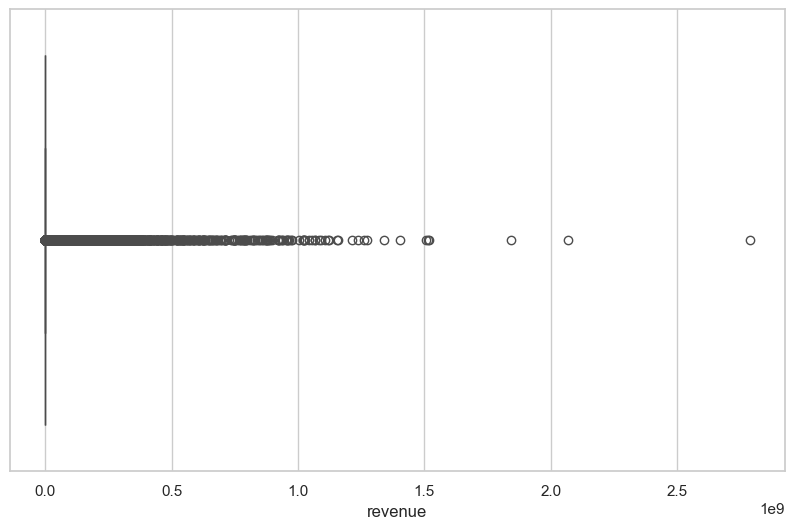

In [50]:
# Boxplot para detectar outliers en una columna 'revenue'
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['revenue'])
plt.show()

In [51]:
# Detectar outliers usando el método IQR
Q1 = movies['revenue'].quantile(0.25)
Q3 = movies['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = movies[(movies['revenue'] < (Q1 - 1.5 * IQR)) | (movies['revenue'] > (Q3 + 1.5 * IQR))]
print(outliers)

         budget  idMovies original_language  \
0      30000000       862                en   
1      65000000      8844                en   
3      16000000     31357                en   
4             0     11862                en   
5      60000000       949                en   
...         ...       ...               ...   
45399    750000    280422                ru   
45401         0    240789                ru   
45409    800000     62757                en   
45412   2000000     63281                en   
45422   5000000     63898                ru   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
5      Obsessive master thief, Neil McCauley leads a ...   17.924927   
...

Se han identificado 7,397 filas como outliers en la columna revenue, lo que representa una porción significativa del DataFrame (aproximadamente el 16% de las filas).
La presencia de un número significativo de outliers sugiere que hay una alta variabilidad en los ingresos reportados. Esto puede ser indicativo de un rango muy amplio de ingresos en las películas, posibles datos erróneos o películas con ingresos extremadamente altos o bajos. 

Diagrama de Caja de la Distribución del Retorno de Inversión (Return)

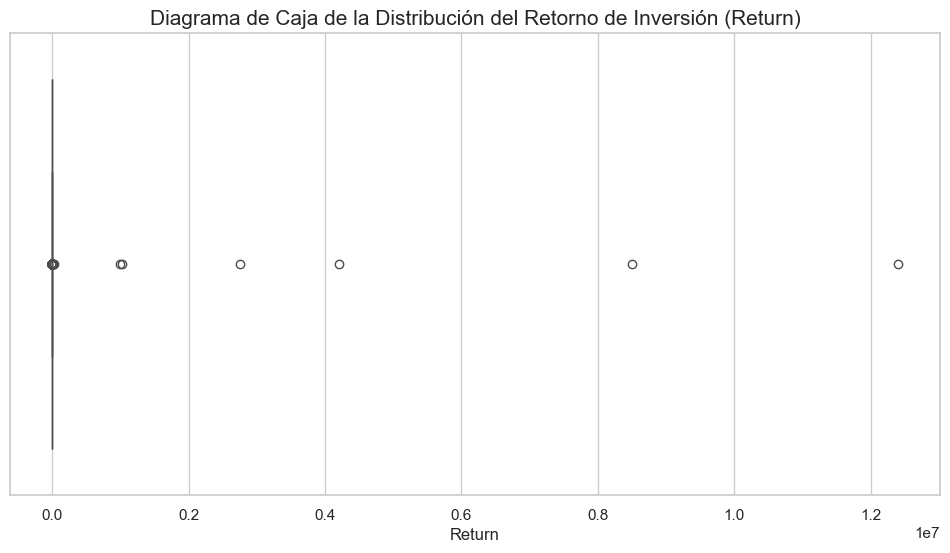

In [52]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear el diagrama de caja para la columna 'return'
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['return'])

# Configurar los títulos y etiquetas
plt.title('Diagrama de Caja de la Distribución del Retorno de Inversión (Return)', fontsize=15)
plt.xlabel('Return', fontsize=12)

# Mostrar la gráfica
plt.show()

El diagrama de caja revela la distribución central de los retornos de inversión, indicando dónde se concentra la mayor parte de los valores de return. ****

Análisis de Anomalías

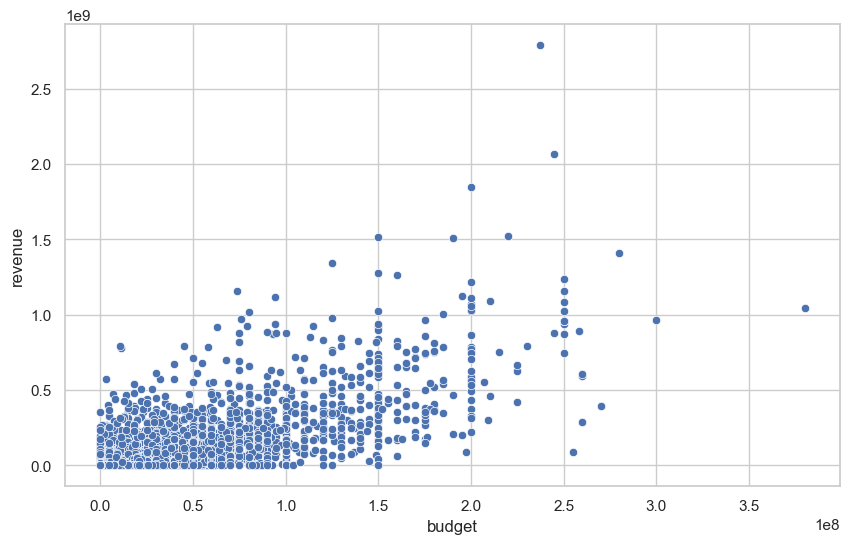

In [53]:
# Relación entre dos variables para detectar anomalías (ejemplo: 'budget' vs 'revenue')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movies)
plt.show()


***

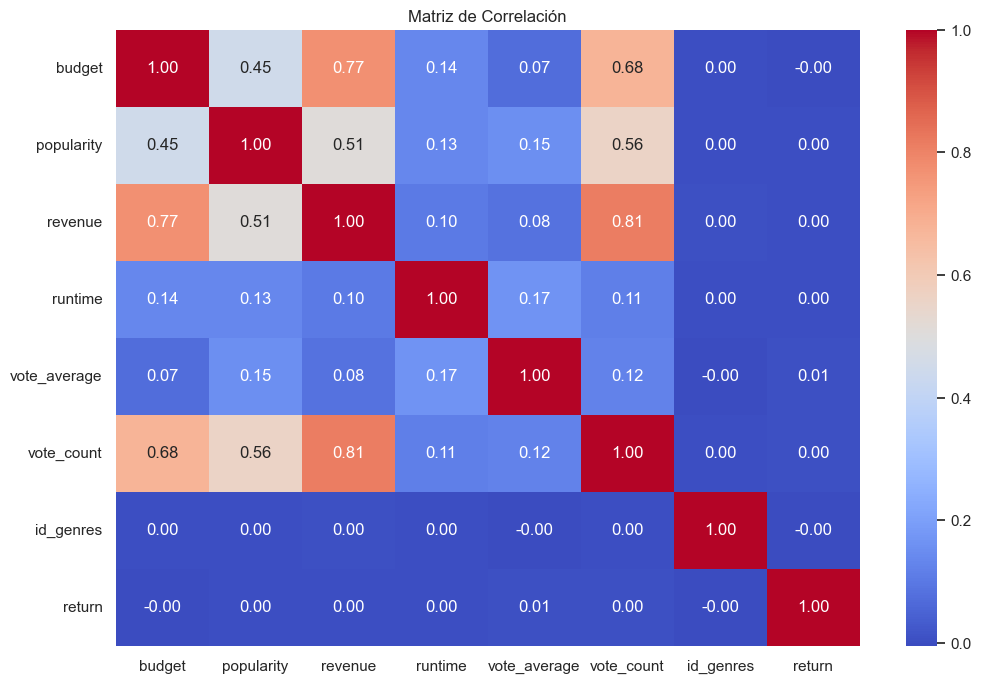

In [54]:
# Selecciona solo las columnas numéricas
numeric_columns = movies.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Con esta matriz de correlacion se puede deducir que no existe una correlacion significativa entre las variables *** 

In [ ]:
# Distribución de variables numéricas
numerical_columns = ['popularity', 'runtime', 'vote_average', 'vote_count']
movies[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
# Convertir 'release_date' a datetime si aún no está en formato datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Agrupar por año y contar el número de películas
movies['release_year'] =movies['release_date'].dt.year
movies.groupby('release_year').size().plot(kind='line', figsize=(12, 6))
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()



In [58]:
# se analiza 'revenue' por 'status'
grouped_stats = movies.groupby('status')['revenue'].describe()
print(grouped_stats)

                   count          mean           std  min  25%  50%  75%  \
status                                                                     
Canceled             1.0  0.000000e+00           NaN  0.0  0.0  0.0  0.0   
In Production       19.0  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.0   
Planned             13.0  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.0   
Post Production     97.0  3.690453e+05  2.565738e+06  0.0  0.0  0.0  0.0   
Released         44907.0  1.134196e+07  6.471441e+07  0.0  0.0  0.0  0.0   
Rumored            229.0  1.395424e+05  1.472549e+06  0.0  0.0  0.0  0.0   
unknown             80.0  1.212500e+03  1.084493e+04  0.0  0.0  0.0  0.0   

                          max  
status                         
Canceled         0.000000e+00  
In Production    0.000000e+00  
Planned          0.000000e+00  
Post Production  2.290552e+07  
Released         2.787965e+09  
Rumored          1.785071e+07  
unknown          9.700000e+04  


***

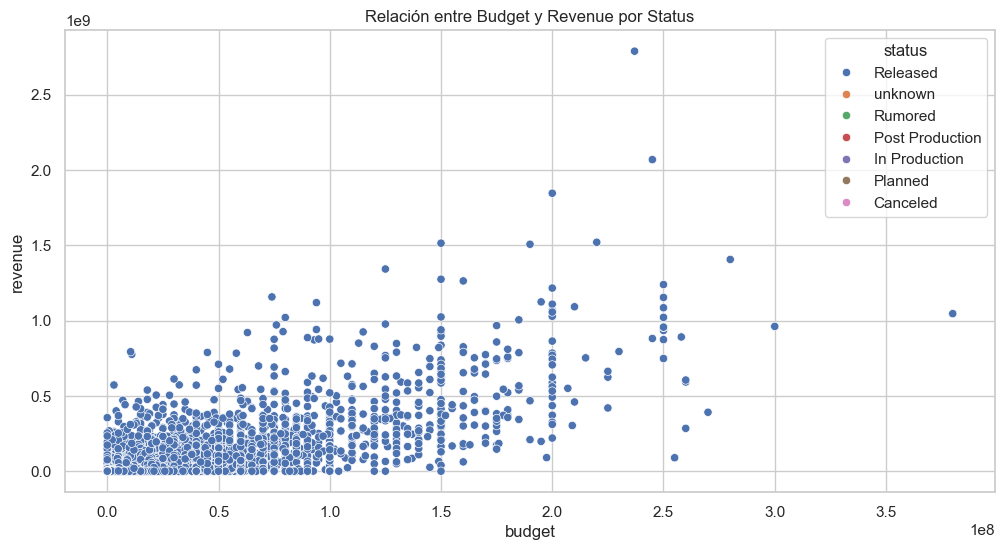

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='revenue', hue='status', data=movies)
plt.title('Relación entre Budget y Revenue por Status')
plt.show()

del dataset credits_cast.parquet

DIFERENTES ANALISIS

Análisis de la participación de actores: Puedes contar cuántas películas ha protagonizado o participado cada actor. 
Esto podría ayudarte a identificar actores prolíficos o su relación con películas exitosas.

In [65]:
# Unir los datasets en base al ID de la película
merged_df = pd.merge(movies, cast_df, left_on='idMovies', right_on='idMovies', how='inner')

name_actor
Samuel L. Jackson     26
Steve Buscemi         26
Demi Moore            25
Whoopi Goldberg       25
Bess Flowers          23
Robert De Niro        23
Joan Cusack           23
Sylvester Stallone    22
Alfred Hitchcock      22
Dan Aykroyd           22
Name: title, dtype: int64


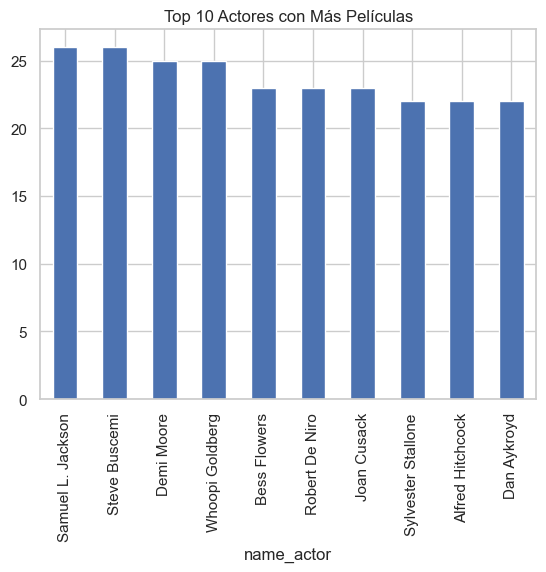

In [66]:
# Contar el número de películas por actor
actor_counts = merged_df.groupby('name_actor')['title'].count().sort_values(ascending=False)

# Ver los actores más prolíficos
print(actor_counts.head(10))

# Visualización
actor_counts.head(10).plot(kind='bar', title='Top 10 Actores con Más Películas')
plt.show()


•	Análisis del éxito de actores: Relaciona los actores con el éxito de las películas en las que han participado (por ejemplo, el retorno de inversión o la popularidad).
Ejemplo: ¿Cuáles son los actores que generan más ingresos promedio por película?


In [68]:
# Agrupar por actor y calcular el promedio del retorno de inversión o popularidad
actor_return = merged_df.groupby('name_actor')['return'].mean().reset_index()

# Ordenar de mayor a menor por el retorno promedio
actor_return_sorted = actor_return.sort_values(by='return', ascending=False)

# Mostrar los 10 actores con mayor retorno promedio
top_actors = actor_return_sorted.head(10)
print(top_actors)


                 name_actor        return
4381         Clive Merrison  4.132128e+06
14930         Leslie Howard  2.098738e+06
18187        Neal McDonough  1.700000e+06
23838       Thomas Mitchell  4.592643e+05
17311       Michael McGlone  3.395402e+05
16806     Maureen Stapleton  1.666667e+05
14821          Leo Carrillo  2.688172e+04
16859            Max Linder  1.289039e+04
23414         Sylvie Lenoir  2.216690e+03
1586   Arthur J. Nascarella  6.888889e+02


C:\Users\evely\AppData\Local\Temp\ipykernel_14136\4070512274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='return', y='name_actor', data=top_actors, palette='viridis')


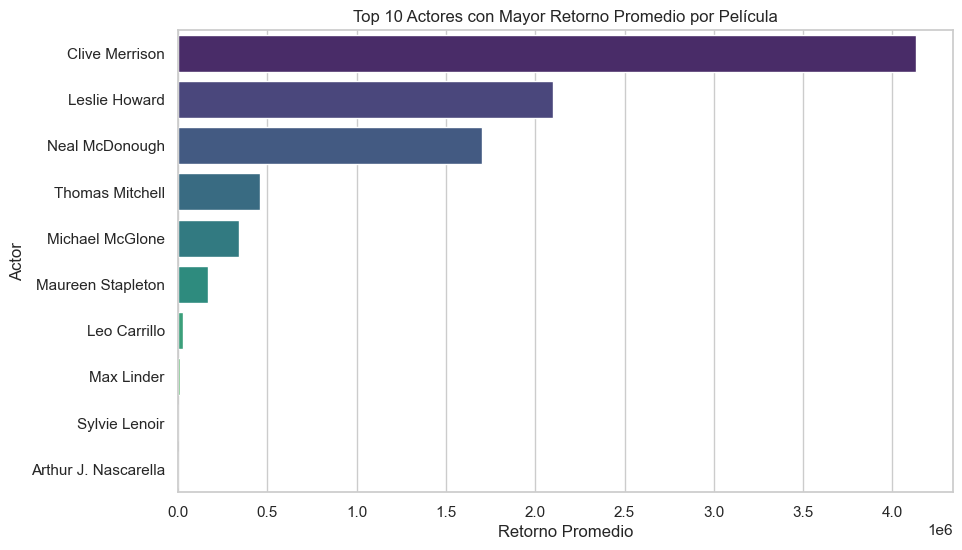

In [69]:
# Crear un gráfico de barras de los actores con mayor retorno promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='return', y='name_actor', data=top_actors, palette='viridis')
plt.title('Top 10 Actores con Mayor Retorno Promedio por Película')
plt.xlabel('Retorno Promedio')
plt.ylabel('Actor')
plt.show()

hacer correlacion de variables Categiricas ***

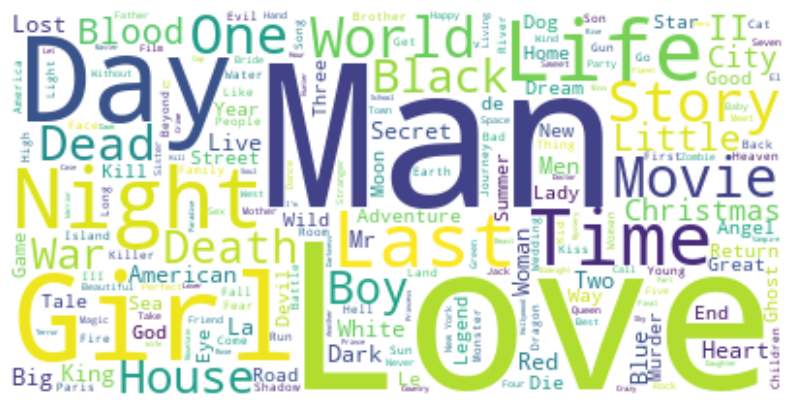

In [73]:
# Preparar los datos
titles = movies['title'].dropna().tolist()
text = ' '.join(titles)

# Generar la nube de palabras
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
# Combina el título, géneros, idioma y overview en una sola columna
movies['combined_features'] = movies['title'] + " " + movies['genres'] + " " + movies['original_language'] + " " + movies['overview']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['overview'].fillna(''))

def recomendar_peliculas(titulo_pelicula, num_recomendaciones=5):
    # Obtener el índice de la película
    idx = movies[movies['title'] == titulo_pelicula].index[0]
    
    # Calcular la similitud con todas las demás películas
    cosine_similarities = cosine_similarity(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = cosine_similarities.argsort()[-num_recomendaciones-1:-1]
    
    # Obtener los nombres de las películas más similares
    similar_movies = movies.iloc[similar_indices]['title'].tolist()
    return similar_movies

# Ejemplo de uso
print(recomendar_peliculas('Toy Story'))


["Andy Hardy's Blonde Trouble", 'Small Fry', 'The 40 Year Old Virgin', 'Toy Story 2', 'Toy Story 3']
